![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


# Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


# Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [25]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df_games = pd.read_csv('./vgsales.csv')

In [26]:
df_games.head(-10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
16309,16402,The Technomancer,PC,2016,Role-Playing,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
16310,16432,Goat Simulator,XOne,2016,Simulation,Koch Media,0.00,0.01,0.00,0.00,0.01
16311,16434,Kamigami no Asobi InFinite,PSV,2016,Adventure,Broccoli,0.00,0.00,0.01,0.00,0.01
16312,16451,Assassin's Creed Chronicles,XOne,2016,Action,Ubisoft,0.00,0.01,0.00,0.00,0.01


In [27]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Qual foi o jogo mais vendido no mundo em 2010?



In [28]:

df_2010 = df_games[df_games['Year'] == 2010].sort_values(by="Rank")
df_2010['Name'].values[0]

'Kinect Adventures!'

Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


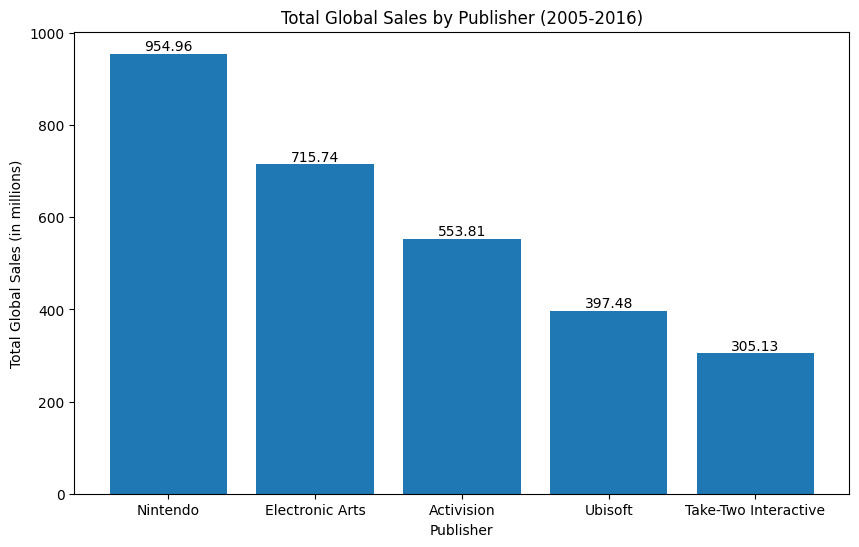

In [51]:
to_plot = df_games[(df_games['Year'] >= 2005) & (df_games['Year'] < 2016)]
to_plot = to_plot.groupby('Publisher')['Global_Sales'].sum().reset_index()
to_plot = to_plot.sort_values(by='Global_Sales', ascending=False)
to_plot = to_plot.head()

plt.figure(figsize=(10, 6))
bars = plt.bar(to_plot['Publisher'], to_plot['Global_Sales'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.bar(to_plot['Publisher'], to_plot['Global_Sales'])
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Total Global Sales by Publisher (2005-2016)')
plt.show()


Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [41]:
df_2008_Sports = df_games[(df_games['Year'] == 2008) & (df_games['Genre'] == 'Sports')].sort_values(by="Rank")
df_2008_Sports['Name'].values[-1]

'Summer Athletics'

Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [50]:
df_wii = df_games[(df_games['Year'] >= 2006) & (df_games['Year'] < 2010) & (df_games['Platform'] == 'Wii')]
f"{round(df_wii['Other_Sales'].sum(), 2)} / {round(df_wii['Global_Sales'].sum(),2)} = {round(df_wii['Other_Sales'].sum()/df_wii['Global_Sales'].sum()*100,2)}%"

'60.35 / 677.48 = 8.91%'

Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


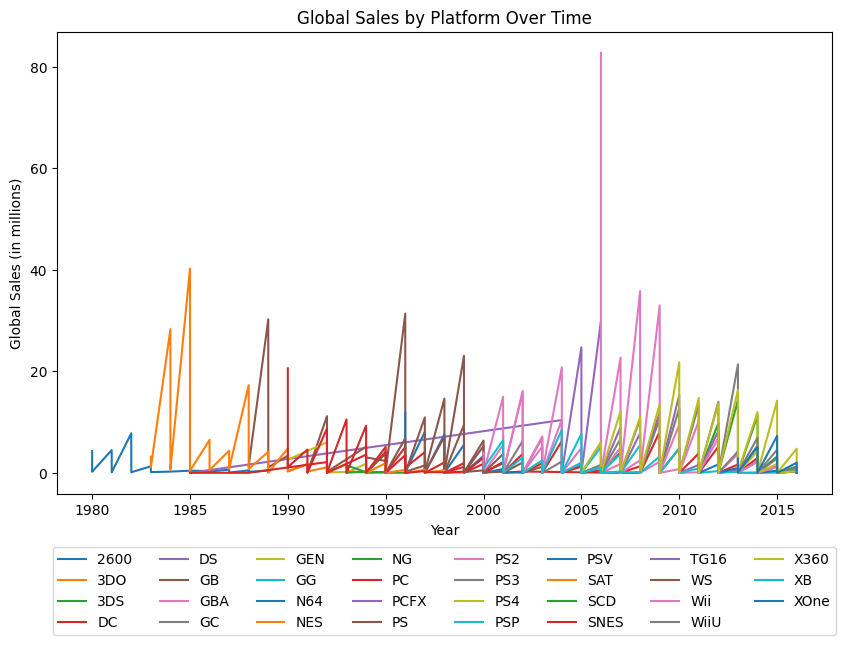

In [78]:
plt.figure(figsize=(10, 6))
for platform in df_games['Platform'].sort_values().unique():
    platform_data = df_games[df_games['Platform'] == platform]
    plt.plot(
        platform_data['Year'], 
        platform_data['Global_Sales'], 
        label=platform
    )

# Adicionar legenda ao gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=8)

plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales by Platform Over Time')
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




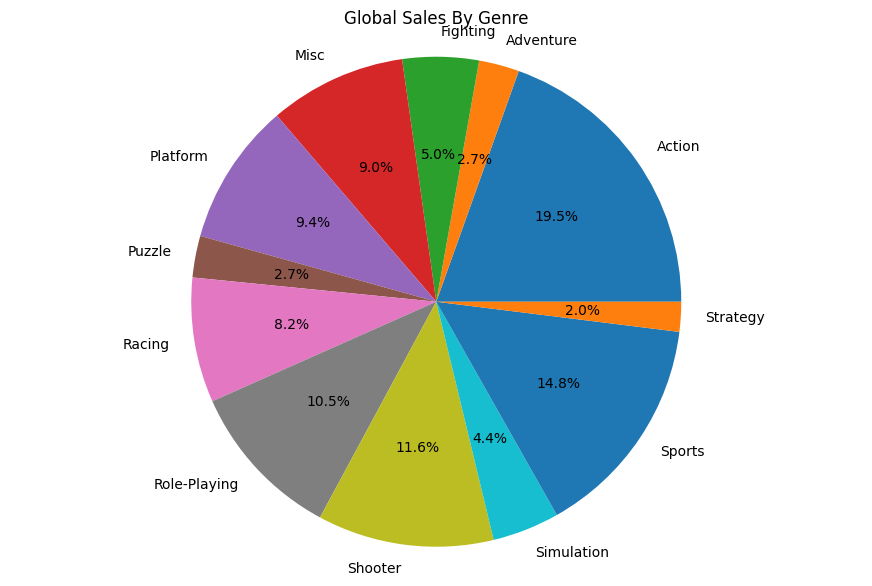

In [86]:
df_genre_sales = df_games.groupby('Genre')['Global_Sales'].sum()
percents = (df_genre_sales / df_genre_sales.sum())*100
percents
plt.figure(figsize=(11, 7))
plt.pie(percents, labels=percents.index, autopct='%1.1f%%')
plt.title("Global Sales By Genre")
plt.axis('equal')
plt.show()

# Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [18]:
import pandas as pd
df_livros = pd.read_csv('./livros.csv')
df_livros_genero = pd.read_csv('./livros_genero.csv')
df_livros_classicos = pd.read_csv('./livros_classicos.csv')

In [45]:
df_livros

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [46]:
df_livros_genero

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio
5,Aventura,Aline
6,Drama,Paulo
7,Aventura,Sandro
8,Romance,Maria
9,Aventura,Fabio


In [47]:
df_livros_classicos

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [32]:
concat_livro_n_genero = pd.concat([df_livros, df_livros_genero], axis=1)
concat_livro_n_genero

,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos
3,livro 4,175.0,Romance,Maria
4,livro 5,321.0,Romance,Fabio
5,livro 6,159.0,Aventura,Aline
6,livro 7,980.0,Drama,Paulo
7,livro 8,235.0,Aventura,Sandro
8,livro 9,745.0,Romance,Maria
9,livro 10,126.0,Aventura,Fabio


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [20]:
concat_livro_n_genero[len(df_livros):]

,nome,paginas,genero,autor
10,NaN,NaN,Romance,Pedro


Faça a junção das bases de livros e livros clássicos.

In [26]:
merged = pd.merge(df_livros, df_livros_classicos)

merged

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [44]:
pd.merge(concat_livro_n_genero, df_livros_classicos, how='outer', on=['autor', 'nome'], validate='1:1').dropna()

,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos
3,livro 4,175.0,Romance,Maria
4,livro 5,321.0,Romance,Fabio
5,livro 6,159.0,Aventura,Aline
6,livro 7,980.0,Drama,Paulo
7,livro 8,235.0,Aventura,Sandro
8,livro 9,745.0,Romance,Maria
9,livro 10,126.0,Aventura,Fabio


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.